In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# Lec 7 Tree 이어서

In [64]:
file1="c:/temp/credit.csv"
data1=pd.read_csv(file1)
data1

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [65]:
pd.value_counts(data1['credit_history'])

repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64

In [66]:
# tree1 : train test split
y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

tree1=DecisionTreeClassifier(max_depth=3,random_state=0)
result1=tree1.fit(X_train,y_train)
result1

DecisionTreeClassifier(max_depth=3, random_state=0)

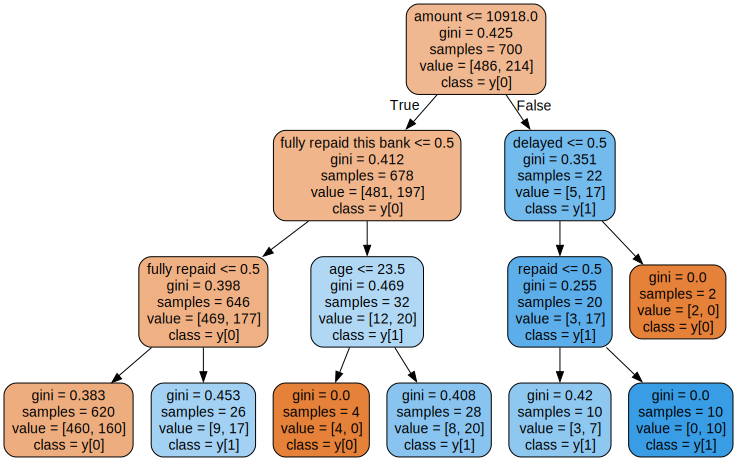

In [67]:
# tree 그리기
dot_data=export_graphviz(result1,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph1=graphviz.Source(dot_data)
tree_graph1

### tree1 해석

1) 가장 위에 있는 변수가 가장 중요한 변수 : amount

2) 0 : No defauly, 1: Yes default -> 알파벳 순

3) class=y[0] -> 0으로 예측, class=y[1] -> 1로 예측

4) 진할 수록 purity 높음 = 0 또는 1에서 한 쪽으로 몰리는 것 = 엔트로피, 지니 계수 낮음

5) 색 종류 따라 다르게 예측

6) classification 일 때 purity 보는 것은 지니계수 or 엔트로피 계수

In [68]:
# gini index 계산해보기

1-((469/646)**2+(177/646)**2)

0.3978424024000997

In [69]:
# tree1; train test split 예측 성과
pred1=result1.predict(X_test)


In [70]:
pred1.shape


(300,)

In [71]:
y_test.shape


(300,)

In [72]:
confusion_matrix(y_test,pred1)

array([[198,  16],
       [ 70,  16]], dtype=int64)

In [73]:
pred1

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], d

In [74]:
y_pred1=result1.predict_proba(X_test)
y_pred1

array([[0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.

In [75]:
# tree2: 전체 다 , gini index
y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')

tree2=DecisionTreeClassifier(max_depth=3,random_state=0)
result2=tree2.fit(X,y)
result2

DecisionTreeClassifier(max_depth=3, random_state=0)

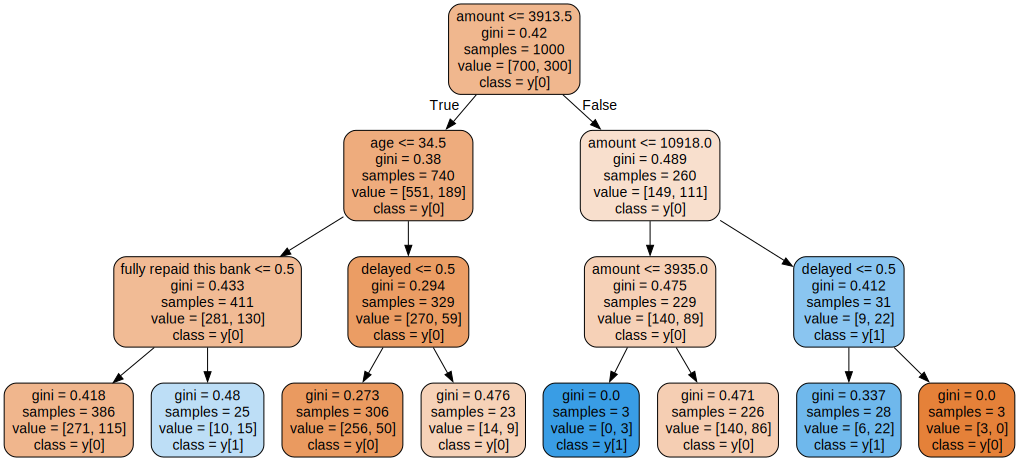

In [76]:
# tree 그리기 

dot_data=export_graphviz(result2,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph2=graphviz.Source(dot_data)
tree_graph2

In [77]:
# tree2 예측성과
pred2=result2.predict(X)
confusion_matrix(y,pred2)

array([[684,  16],
       [260,  40]], dtype=int64)

In [78]:
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [79]:
# 각 pred2의 값이 1일 확률 / 2일 확률
y_pred2=result2.predict_proba(X)
y_pred2

array([[0.83660131, 0.16339869],
       [0.61946903, 0.38053097],
       [0.83660131, 0.16339869],
       ...,
       [0.83660131, 0.16339869],
       [0.70207254, 0.29792746],
       [0.61946903, 0.38053097]])

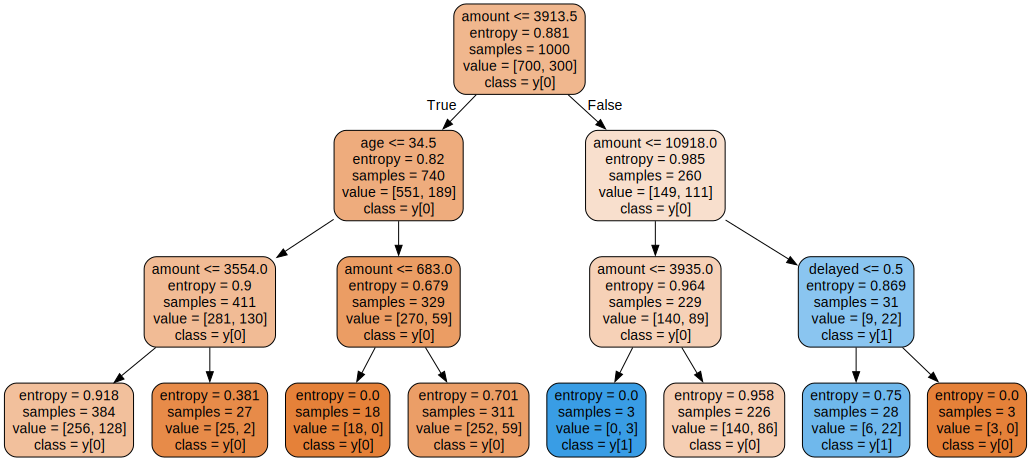

In [80]:
# tree3 : entropy 전체 다

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')

tree3=DecisionTreeClassifier(max_depth=3,random_state=0,criterion='entropy')
result3=tree3.fit(X,y)

dot_data=export_graphviz(result3,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph3=graphviz.Source(dot_data)
tree_graph3

In [81]:
# entropy 계산 직접 해보기

-(256/384)*np.log2(256/384)-(128/384)*np.log2(128/384)

0.9182958340544896

In [82]:
# tree3 예측 성과
pred3=result3.predict(X_test)


In [83]:
pred3.shape

(300,)

In [84]:
y_test.shape

(300,)

In [85]:
confusion_matrix(y_test,pred3)

array([[211,   3],
       [ 79,   7]], dtype=int64)

In [86]:
pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [87]:
y_pred3=result3.predict_proba(X)
y_pred3

array([[0.81028939, 0.18971061],
       [0.61946903, 0.38053097],
       [0.81028939, 0.18971061],
       ...,
       [0.81028939, 0.18971061],
       [0.66666667, 0.33333333],
       [0.61946903, 0.38053097]])

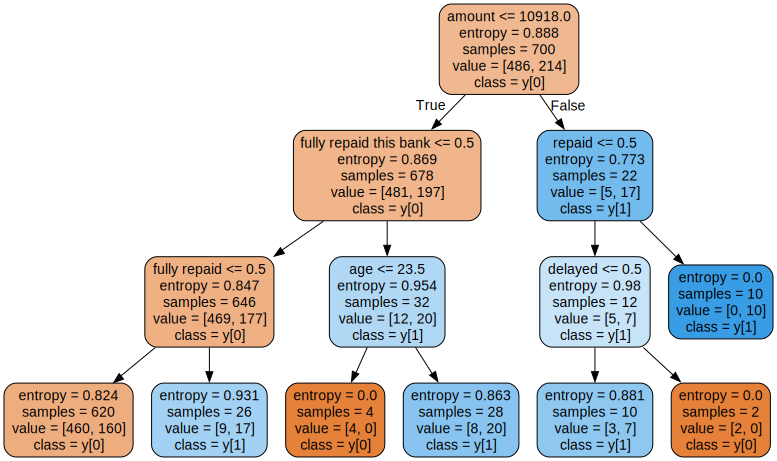

In [88]:
# tree4 : entropy train test split

y=data1['default']
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X=pd.concat([X1,data1['age'],data1['amount']],axis='columns')
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

tree4=DecisionTreeClassifier(max_depth=3,random_state=0,criterion='entropy')
result4=tree4.fit(X_train,y_train)

dot_data=export_graphviz(result4,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph4=graphviz.Source(dot_data)
tree_graph4


In [89]:
# tree4 예측성과
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[198,  16],
       [ 70,  16]], dtype=int64)

In [90]:
pred4

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], d

In [91]:
y_pred4=result4.predict_proba(X_test)
y_pred4

array([[0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.28571429, 0.71428571],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.74193548, 0.25806452],
       [0.

In [92]:
# 얘도  confusion matrix 만 안되네..

# Lec 8 Regression tree

In [93]:
file2="c:/temp/Boston.csv"
data2=pd.read_csv(file2)
data2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


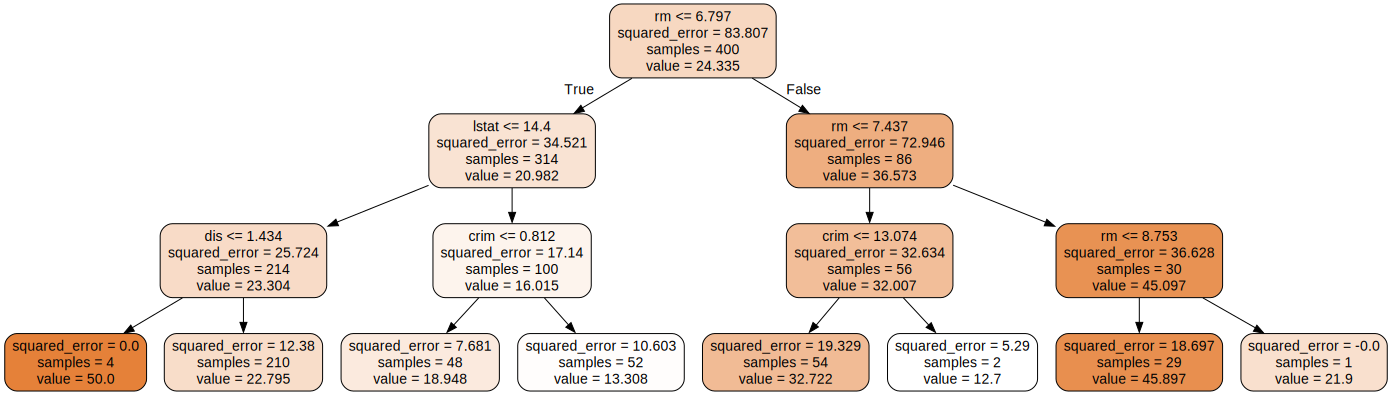

In [94]:
y=data2['medv']
X=data2.drop('medv',axis=1)

X_train=X.iloc[:400,:]
X_test=X.iloc[400:,:]
y_train=y.iloc[:400]
y_test=y.iloc[400:]

# gini index tree 만들기
tree5=DecisionTreeRegressor(max_depth=3, random_state=0)
result5=tree5.fit(X_train,y_train)

dot_data=export_graphviz(result5,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph5=graphviz.Source(dot_data)
tree_graph5

### regression tree 해석

1) tree size = final node 개수

2) tree depth : tree만들 때 지정했음

3) 가장 중요한 변수 = 가장 위에 있는 변수

4) RSS를 최소화 해야함 <- 예측 성과
    - RSS와 MSE는 비슷한 것
    
5) 색이 진할 수록 y(value)가 큰 것

6) value= 해당 노드 y의 평균값


## RSS: Residual Sum of Square

- 예측 성과 좋다는 것 = 예측 값과 실제값이 비슷한 것 <- 연속형 변수이니까
- 얼마나 비슷하냐? 그 기준이 => RSS (잔차 제곱의 합)
    - RSS를 최소화하는 분기를 하는게 목적!
    - 분기 했을 때 왼쪽의 RSS와 오른쪽의 RSS를 구해서 그 합이 최소가 되도록 분기한다.
    
## 분기 멈추는 법

- 최소한 노드에 몇개 들어가도록 정하기 ex 5개
- tree depth를 지정하기

In [95]:
# tree 5 예측 성과 계산

pred5=result5.predict(X_test)
mean_squared_error(y_test, pred5)

45.38108891089216